In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
data = pd.read_csv("Social_Network_Ads.csv")

In [3]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
data.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
395    False
396    False
397    False
398    False
399    False
Length: 400, dtype: bool

# Splitting data

In [8]:
X = data[['Age', 'EstimatedSalary']].values
y = data['Purchased'].values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Feature Scaling

In [10]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Training SVM model

Training SVM with Linear Kernel

In [11]:
classifier_linear = SVC(kernel='linear', random_state=0)
classifier_linear.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


Training SVM with RBF Kernel

In [12]:
classifier_rbf = SVC(kernel='rbf', random_state=0)
classifier_rbf.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


# Visualize Decision Boundary 

In [13]:
def visualize_boundary(classifier, X_set, y_set, title):
    X1, X2 = np.meshgrid(
        np.arange(start=X_set[:, 0].min()-1, stop=X_set[:, 0].max()+1, step=0.01),
        np.arange(start=X_set[:, 1].min()-1, stop=X_set[:, 1].max()+1, step=0.01)
    )
    plt.figure(figsize=(8,6))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T)
                 .reshape(X1.shape),
                 alpha=0.75, cmap=ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set==j, 0], X_set[y_set==j, 1],
                    c=ListedColormap(('red', 'green'))(i), label=j)
    plt.title(title)
    plt.xlabel('Age (scaled)')
    plt.ylabel('Estimated Salary (scaled)')
    plt.legend()
    plt.show()

C:\Users\almis\AppData\Local\Temp\ipykernel_4492\1622294257.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set==j, 0], X_set[y_set==j, 1],


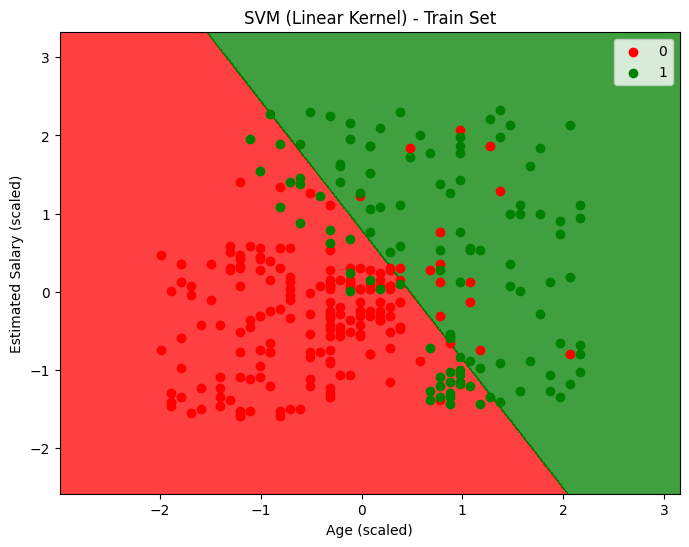

In [14]:
visualize_boundary(classifier_linear, X_train, y_train, 'SVM (Linear Kernel) - Train Set')

C:\Users\almis\AppData\Local\Temp\ipykernel_4492\1622294257.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set==j, 0], X_set[y_set==j, 1],


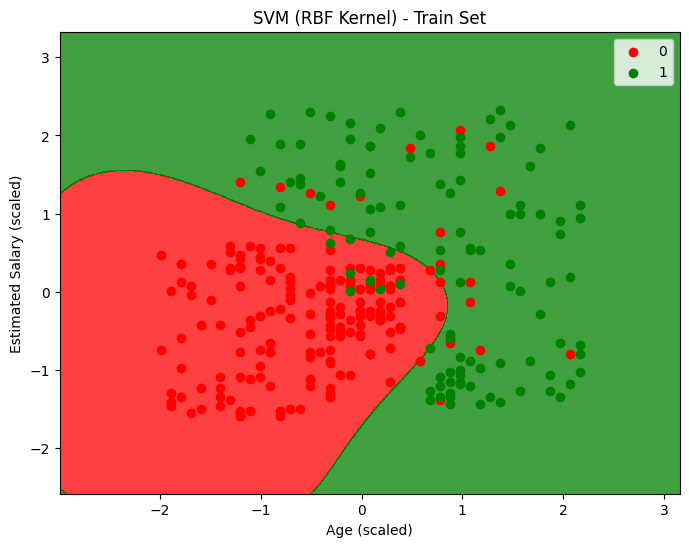

In [15]:
visualize_boundary(classifier_rbf, X_train, y_train, 'SVM (RBF Kernel) - Train Set')

In [16]:
y_pred_rbf = classifier_rbf.predict(X_test)

# Evaluation: Confusion Matrix & Classification Report

In [17]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rbf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rbf))
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_rbf) * 100))


Confusion Matrix:
 [[64  4]
 [ 3 29]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100

Accuracy: 93.00%


# Hyperparameter Tuning using GridSearchCV for RBF Kernel

In [18]:
parameters = {'C': [0.1, 1, 10, 100],
              'gamma': [0.1, 0.01, 0.001],
              'kernel': ['rbf']}

grid_search = GridSearchCV(estimator=SVC(random_state=0),
                           param_grid=parameters,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

,estimator,SVC(random_state=0)
,param_grid,"{'C': [0.1, 1, ...], 'gamma': [0.1, 0.01, ...], 'kernel': ['rbf']}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,100


In [19]:
print("\nBest Parameters from GridSearchCV:", grid_search.best_params_)


Best Parameters from GridSearchCV: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


# Cross-Validation Score of the best model

In [20]:
best_model = grid_search.best_estimator_
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5)

In [21]:
print("\nCross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy: {:.2f}%".format(cv_scores.mean() * 100))


Cross-Validation Accuracy Scores: [0.9        0.9        0.83333333 0.91666667 0.96666667]
Mean CV Accuracy: 90.33%


C:\Users\almis\AppData\Local\Temp\ipykernel_4492\1622294257.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set==j, 0], X_set[y_set==j, 1],


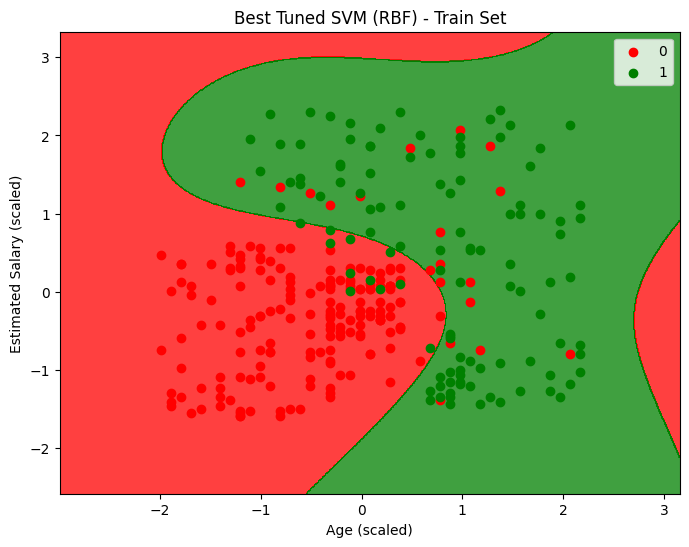

In [22]:
visualize_boundary(best_model, X_train, y_train, 'Best Tuned SVM (RBF) - Train Set')